# 1. Segmentation

This notebook contains example code for computing the segments for the template. Note that the data used in the examples is not the real-life production dataset we used in the paper.

In [1]:
from src.example_data import sensor_data_example

from src.changepoints import ChangePointDetection
import src.twopass as tpass

C:\Users\a.seeliger\Miniconda3\envs\eventlog-inferrence\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


## 1.0. Determine change points
The following three examples show the different change point detection algorithms used in our framework.

In [2]:
# compute change points via sliding window
cp = ChangePointDetection()
change_points = cp.rupture(sensor_data_example, None, 10, "l2", 5, "Window")
print(change_points)

[7, 13, 26, 33, 41]


In [3]:
# compute change points via binary segmentation
change_points = cp.rupture(sensor_data_example, None, 10, "l2", 5, "Binseg")
print(change_points)

[7, 13, 26, 33, 41]


In [4]:
# compute change points via bottom-up segmentation
change_points = cp.rupture(sensor_data_example, None, 10, "l2", 5, "Botup")
print(change_points)

[5, 7, 12, 15, 25, 27, 32, 35, 41]


## 1.1. Segmentation
The first building block deals with the segmentation of the time series into segments of similar behavior. The following example show the segmentation using one of the three above shown change point detection algorithms to segement the time series.

In [5]:
# segment time series via sliding window approach
segments = tpass.firstPass(sensor_data_example, 10, 5, method="Window")
print(segments)

[[10, 15, 17, 18, 18, 17], [18, 4, 3, 4, 5, 3, 5, 4, 3, 2, 3, 4, 3], [10, 16, 17, 17, 18, 17, 17], [16, 4, 3, 2, 4, 5, 4, 4]]


In [6]:
# cluster the segments into active and inactive segments
active_segments = tpass.clusterSegments(segments)
print(active_segments)

Average value: 4 ; Number of segments: 4
Number of labels:  4
Kept 2 segments out of 2 total
[[10, 15, 17, 18, 18, 17], [10, 16, 17, 17, 18, 17, 17]]


## 1.2. Data cleaning
The second step is to trim all identified segments to prepare them for the merging.

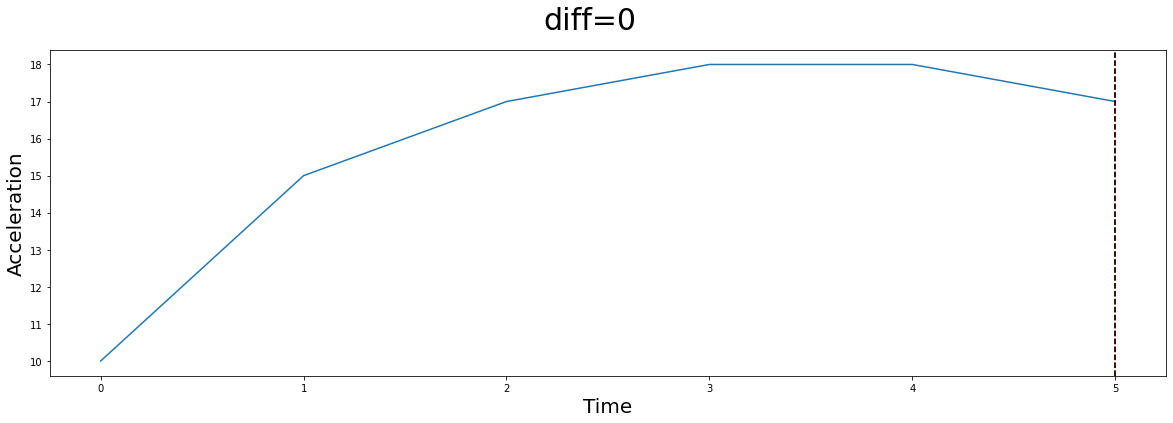

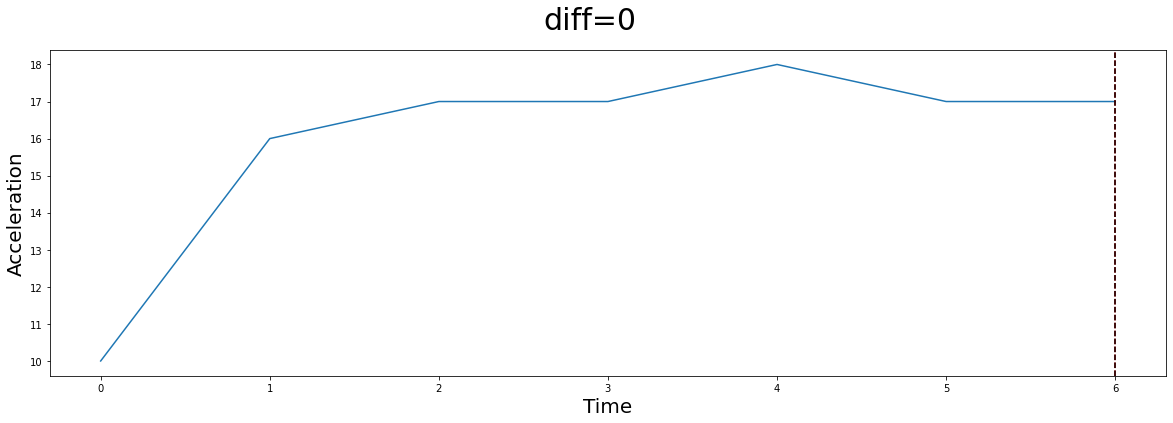

[[10, 15, 17, 18, 18, 17], [10, 16, 17, 17, 18, 17, 17]]


In [7]:
# trim segments
trimmed_segments = [tpass.trimming(x, debug=True) for x in active_segments]
print(trimmed_segments)

## 1.3. Merging of all active working segments
The third step is to merge all the identified active segments into a template.

In [8]:
# averaging the segments
template_averaged = tpass.averageTemplate(trimmed_segments)
print(template_averaged)

[10.0, 15.5, 17.0, 17.5, 18.0, 17.0]


In [9]:
# barycenter averaging the segments
template_b_averaged = tpass.barycenterTemplate(trimmed_segments)
print(template_b_averaged)

[10.0, 15.5, 17.0, 17.5, 18.0, 17.0, 17.0]
